In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pylab import rcParams

In [2]:
# This is the 'Census Income Data Set' downloaded from http://archive.ics.uci.edu/ml/datasets/Census+Income
# It has been slightly modified for this task. 
# It contains various features and >30K observations labelled according to yearly income (>50K or <=50K)
census = pd.read_csv('wage_census.csv')
census.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,capital-gain,capital-loss,hours-per-week,native-country,>50K,Female
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,2174,0,40,ASU,False,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,0,0,13,setatS-detinU,False,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,0,0,40,setatS-detinU,False,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,0,0,40,ASU,False,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,0,0,40,ASU,False,1


In [3]:
# How many records and features do we have in the dataset?
print(census.info())
# Are there any missing values?
### There are 2 features with missing values: 'workclass' and 'occupation'
# If so, how many? What would you do with them? (Dropping them for the exercise is ok in interest of time)
census = census.drop(['workclass', 'occupation'], axis=1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
age               32561 non-null int64
workclass         30725 non-null object
fnlwgt            32561 non-null int64
education         32561 non-null object
education-num     32561 non-null int64
marital-status    32561 non-null object
occupation        30718 non-null object
relationship      32561 non-null object
race              32561 non-null object
capital-gain      32561 non-null int64
capital-loss      32561 non-null int64
hours-per-week    32561 non-null int64
native-country    32561 non-null object
>50K              32561 non-null bool
Female            32561 non-null int64
dtypes: bool(1), int64(7), object(7)
memory usage: 3.5+ MB
None


In [4]:
# There is a native-country field, How many different countries are there?
unique_countries = census['native-country'].unique()
n_unique_countries = unique_countries.shape[0]
print('There are ' + str(n_unique_countries) + ' unique county names', '\n')
print(unique_countries, '\n')
# Anything wrong with the country names?
## name is reversed for all of them, some appear twice (USA, United-States)
# Can you clean up the country names?
census['native-country'] = census['native-country'].apply(lambda x: x[::-1])
print(census['native-country'].unique(), '\n')
census['native-country'].replace(to_replace='USA', value='United-States', inplace=True)
# Can you give a summary statistic? e.g. most common country, rank etc.
most_common = census['native-country'].value_counts()
rank = np.arange(1, most_common.shape[0] + 1)
most_common_df = pd.DataFrame([rank, most_common.index, most_common]).T
most_common_df.columns = ['Rank', 'Country', 'Occurances']
most_common_df.head(10)

There are 43 unique county names 

['ASU' 'setatS-detinU' 'ocixeM' 'dnaliahT' 'senippilihP' 'ociR-otreuP'
 'rodavlaS-lE' 'cilbupeR-nacinimoD' '?' 'alametauG' 'aidnI' 'ynamreG'
 'napaJ' 'abuC' 'anihC' 'eceerG' 'ylatI' 'manteiV' 'nawiaT' 'itiaH'
 'dnalgnE' 'dnaloP' 'adanaC' 'htuoS' 'lagutroP' 'dnaltocS' 'narI'
 'aciamaJ' 'ureP' 'soaL' 'aibmuloC' 'sarudnoH'
 ')cte-IVSU-mauG(SU-gniyltuO' 'rodaucE' 'aivalsoguY' 'dnalerI'
 'ogaboT&dadanirT' 'augaraciN' 'aidobmaC' 'ecnarF' 'yragnuH' 'gnoH'
 'sdnalrehteN-dnaloH'] 

['USA' 'United-States' 'Mexico' 'Thailand' 'Philippines' 'Puerto-Rico'
 'El-Salvador' 'Dominican-Republic' '?' 'Guatemala' 'India' 'Germany'
 'Japan' 'Cuba' 'China' 'Greece' 'Italy' 'Vietnam' 'Taiwan' 'Haiti'
 'England' 'Poland' 'Canada' 'South' 'Portugal' 'Scotland' 'Iran'
 'Jamaica' 'Peru' 'Laos' 'Columbia' 'Honduras'
 'Outlying-US(Guam-USVI-etc)' 'Ecuador' 'Yugoslavia' 'Ireland'
 'Trinadad&Tobago' 'Nicaragua' 'Cambodia' 'France' 'Hungary' 'Hong'
 'Holand-Netherlands'] 



,Rank,Country,Occurances
0,1,United-States,29784
1,2,Mexico,529
2,3,?,469
3,4,Philippines,172
4,5,Germany,109
5,6,Puerto-Rico,92
6,7,India,88
7,8,Canada,88
8,9,El-Salvador,88
9,10,Cuba,77


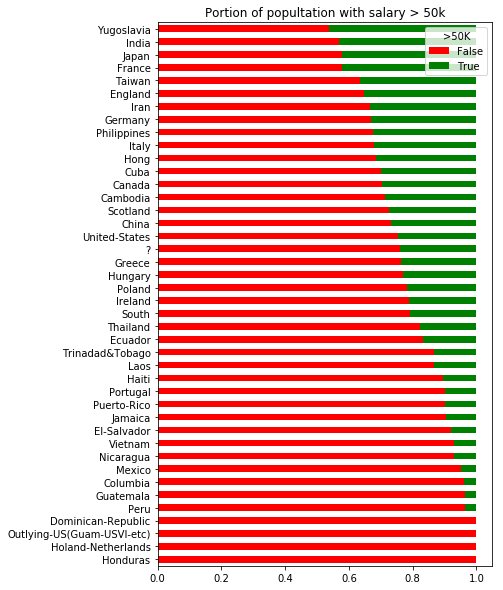

In [5]:
# Draw a bar chart (or similar) of the '>50K' distribution per country.
rcParams['figure.figsize'] = 6, 10
#census.groupby('native-country')['>50K'].value_counts().unstack()
ct = pd.crosstab(census['native-country'], census['>50K'], normalize='index')
ct = ct.sort_values(by=1, ascending=True)
ct.plot.barh(stacked=True, color=['red','green'])
plt.ylabel('')
plt.title('Portion of popultation with salary > 50k')
plt.show()

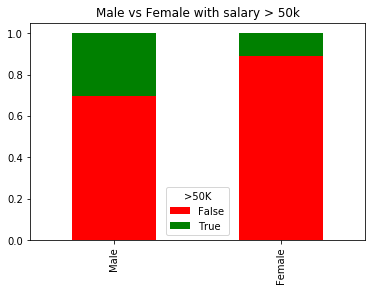

In [6]:
# What can you say about the correlation between 'Female' and '>50K'?
rcParams['figure.figsize'] = 6, 4
ct_female = pd.crosstab(census['Female'], census['>50K'], normalize='index')
ct_female.index = ['Male', 'Female']
ct_female.plot.bar(stacked=True, color = ['red', 'green'])
plt.title('Male vs Female with salary > 50k')
plt.show()
# Is the fraction of '>50K' higher for women or for men?
### yes: ~30% of men, and ~10% of women make more than 50k,

In [7]:
# Develop a model to predict the wage category using the given dataset.
# How many categorical predictors do we have? How should we handle those?
# How do you handle previously unseen categories in new observations?

# Move on by loading data that is already dummy variable'd:
census_dummies = pd.read_csv('wage_census_dummies.csv')
census_dummies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Columns: 107 entries, age to yragnuH
dtypes: bool(1), int64(106)
memory usage: 26.4 MB


In [8]:
import sys
import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
X = census_dummies.drop('>50K', axis=1)
y = census_dummies[['>50K']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)
def cv10(model):
    cv = cross_validate(model, X_train, y_train, cv=10, scoring='f1')
    train_score = np.round(cv['train_score'].mean(), 5)
    val_score = np.round(cv['test_score'].mean(), 5)
    return train_score, val_score
# Logistic Regression:
lr = LogisticRegression()
train_score, val_score = cv10(lr)
print('Logistic regression: Train score = ' + str(train_score) + ', Val score = ' + str(val_score))
# Random Forests
rf = RandomForestClassifier(n_estimators = 100)
train_score, val_score = cv10(rf)
print('RF (max_features: sqrt): Train score = ' + str(train_score) + ', Val score = ' + str(val_score))
rf = RandomForestClassifier(n_estimators = 100, max_features=10)
train_score, val_score = cv10(rf)
print('RF (max_features: 10): Train score = ' + str(train_score) + ', Val score = ' + str(val_score))
rf = RandomForestClassifier(n_estimators = 20, max_features=10)
train_score, val_score = cv10(rf)
print('RF (estimators:20, max_features: 10): Train score = ' + str(train_score) + ', Val score = ' + str(val_score))

Logistic regression: Train score = 0.3877, Val score = 0.38782
RF (max_features: sqrt): Train score = 0.99991, Val score = 0.67597
RF (max_features: 10): Train score = 0.99994, Val score = 0.67473
RF (estimators:20, max_features: 10): Train score = 0.99191, Val score = 0.66677


In [9]:
final_model = RandomForestClassifier(n_estimators = 20, max_features=10)
final_model.fit(X_train, y_train)
y_pred = final_model.predict(X_test)
f1 = f1_score(y_test, y_pred)
print('F1 score with final model: ' + str(np.round(f1, 5)))

F1 score with final model: 0.62064


In [ ]:
# We are going to split the dataset in train/test.
# What is a reasonable value for test_size value below for the given dataset?
# What possibilities exist to increase the number of test observations?
# How would you split if we had e.g. 1e6 observations available?


In [ ]:
# Pick an ML solution that you would use for this problem.
# Explain the solution, including pros/cons. How would you explain the chosen model to a 6 year old?
# Train the model.


In [ ]:
# How do you assess and visualize the performance of your model?
# How would you do that for a regression problem?


In [ ]:
# How can you check whether the model overfits?
# Explain the bias/variance trade-off.
# How do you combat overfitting?


In [ ]:
# We received additional data with new customers and predict the income class ('>50K') with our model.
# We want to launch a marketing campaign targeting only people with '>50K' yearly income.
# We want to minimize the cost of the campaign by targeting the optimal sub-sample of our customer base.
# How would you go about it?
